# **Exploring the Dataset and Analysis**

## Install the required library

In [113]:
import micropip

# Install both pandas and matplotlib
await micropip.install(['pandas', 'matplotlib'])

# Import the libraries after installation
import pandas as pd
import matplotlib.pyplot as plt

# Print versions to confirm installation
print("Pandas version:", pd.__version__)

Pandas version: 2.2.3


## Load the dataset

In [114]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [115]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

In [116]:
await download(file_path, "survey_data.csv")
file_name="survey_data.csv"  

In [117]:
df = pd.read_csv(file_name)

## Explore the dataset

Check the top 5 rows and columns in the dataset

In [118]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Find the number of rows and columns in the dataset

In [119]:
print(f"Number of rows: {len(df)}")

Number of rows: 65457


In [120]:
print(f"Number of columns: {df.columns.size}")

Number of columns: 114


Identify the data types of each column

In [121]:
## Write your code here
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


Identify the Shape of the Dataset

In [122]:
df.shape

(65457, 114)

Identify the missing values

In [123]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    missing_data1 = missing_data[column].value_counts()
    print (missing_data1)
    print("") 

ResponseId
False    65457
Name: count, dtype: int64

MainBranch
False    65457
Name: count, dtype: int64

Age
False    65457
Name: count, dtype: int64

Employment
False    65457
Name: count, dtype: int64

RemoteWork
False    54820
True     10637
Name: count, dtype: int64

Check
False    65457
Name: count, dtype: int64

CodingActivities
False    54480
True     10977
Name: count, dtype: int64

EdLevel
False    60803
True      4654
Name: count, dtype: int64

LearnCode
False    60507
True      4950
Name: count, dtype: int64

LearnCodeOnline
False    49251
True     16206
Name: count, dtype: int64

TechDoc
False    40907
True     24550
Name: count, dtype: int64

YearsCode
False    59887
True      5570
Name: count, dtype: int64

YearsCodePro
False    51623
True     13834
Name: count, dtype: int64

DevType
False    59463
True      5994
Name: count, dtype: int64

OrgSize
False    47488
True     17969
Name: count, dtype: int64

PurchaseInfluence
False    47414
True     18043
Name: count, dtype: 

Generate basic statistics for numerical columns

In [124]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65457.000000,3.374400e+04,29664.000000,29330.000000,29399.000000,29417.000000,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,2.343700e+04,29131.000000
mean,32714.493591,2.963490e+145,11.466323,18.578998,7.520604,10.059485,24.339971,22.964277,20.279127,16.167837,10.953481,9.953618,8.615893e+04,6.934915
std,18892.431636,5.443794e+147,9.168205,25.965347,18.421094,21.831924,27.088870,27.017634,26.110706,24.844177,22.904463,21.775070,1.867532e+05,2.088356
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16354.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32716.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49076.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.080000e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [125]:
df.info

<bound method DataFrame.info of        ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Employment  \
0      Under 18 years o

### Identify and Analyze Duplicates

In [126]:
#Checking the existence of duplicates
duplicates = df[df.duplicated()]

# View the duplicate rows
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       ResponseId                                         MainBranch  \
65437           1                     I am a developer by profession   
65438           2                     I am a developer by profession   
65439           3                     I am a developer by profession   
65440           4                              I am learning to code   
65441           5                     I am a developer by profession   
65442           6                        I code primarily as a hobby   
65443           7  I am not primarily a developer, but I write co...   
65444           8                              I am learning to code   
65445           9                        I code primarily as a hobby   
65446          10                     I am a developer by profession   
65447       18522                     I am a developer by profession   
65448       49767                        I code primarily as a hobby   
65449       51198                     I am a dev

In [127]:
# Count total duplicate rows
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")

Total duplicate rows: 20


In [128]:
# Remove duplicates and keep the first occurrence
df_cleaned = df.drop_duplicates()

In [129]:
# Check if duplicates exist in the cleaned DataFrame
print("Checking for duplicates after removal:")
print(df_cleaned.duplicated().sum())

Checking for duplicates after removal:
0


###  Identifying and Removing Inconsistencies

In [130]:
#Checking the existance of null values
null_values = df_cleaned[["EdLevel", "Country", "Age"]].isnull().sum()
print(null_values)

EdLevel    4653
Country    6507
Age           0
dtype: int64


In [131]:
#Checking the unique data types in the column
data_types_EdLevel = df_cleaned["EdLevel"].map(type).unique()
print(data_types_EdLevel)

[<class 'str'> <class 'float'>]


In [132]:
#Checking the unique data types in the column
data_types_Age = df_cleaned["Age"].map(type).unique()
print(data_types_Age)

[<class 'str'>]


In [133]:
#Checking the unique data types in the column
data_types_Country = df_cleaned["Country"].map(type).unique()
print(data_types_Country)

[<class 'str'> <class 'float'>]


### Standardize entries in columns

In [134]:
#Standardize entries in the columns
df_cleaned.loc[:, 'EdLevel'] = df_cleaned['EdLevel'].astype('object')
df_cleaned.loc[:, 'Country'] = df_cleaned['Country'].astype('object')

### Check the unique values

In [135]:
print(df_cleaned['Country'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [136]:
print(df_cleaned['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [137]:
print(df_cleaned['EdLevel'].unique())

['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]


In [138]:
print(df_cleaned['LanguageHaveWorkedWith'].unique())

[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript'
 'C#' ...
 'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript'
 'C;C++;Go;Lua;Objective-C;Python;Rust;SQL'
 'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript']


In [139]:
print(df_cleaned['DatabaseHaveWorkedWith'].unique())

[nan 'Dynamodb;MongoDB;PostgreSQL' 'Firebase Realtime Database' ...
 'MySQL;Presto;Redis;TiDB'
 'Dynamodb;Elasticsearch;IBM DB2;MariaDB;MySQL;PostgreSQL'
 'Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite']


In [140]:
print(df_cleaned['PlatformHaveWorkedWith'].unique())

[nan 'Amazon Web Services (AWS);Heroku;Netlify' 'Google Cloud' ...
 'Amazon Web Services (AWS);Cloudflare;Digital Ocean;Google Cloud;Microsoft Azure;Netlify;PythonAnywhere;Render'
 'Alibaba Cloud;Amazon Web Services (AWS);Colocation;Databricks;Firebase;Fly.io;Google Cloud;Heroku;Managed Hosting;Microsoft Azure;Netlify;OpenStack;PythonAnywhere;Vercel;VMware'
 'Amazon Web Services (AWS);Cloudflare;Firebase;Linode, now Akamai;Vercel']


In [141]:
print(df_cleaned['WebframeHaveWorkedWith'].unique())

[nan 'Express;Next.js;Node.js;React' 'ASP.NET CORE' ...
 'Angular;jQuery;Laravel;React;Ruby on Rails;WordPress'
 'Django;Express;Laravel;Next.js;Node.js;Svelte;WordPress'
 'Angular;AngularJS;ASP.NET;ASP.NET CORE;Drupal;jQuery;Next.js;Node.js;React;Spring Boot']


In [142]:
print(df_cleaned['LanguageWantToWorkWith'].unique())

[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript'
 'C#' ...
 'Bash/Shell (all shells);C;C++;Elixir;Erlang;Go;HTML/CSS;Java;JavaScript;Kotlin;Lua;PowerShell;Python;Rust;Solidity;SQL;TypeScript;VBA;Visual Basic (.Net);Zig'
 'Bash/Shell (all shells);C;C++;Python;Ruby;SQL'
 'Bash/Shell (all shells);C#;Go;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Python;Rust;SQL;Swift;TypeScript']


In [143]:
print(df_cleaned['DatabaseWantToWorkWith'].unique())

[nan 'PostgreSQL' 'Firebase Realtime Database' ...
 'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis'
 'MySQL;Presto;TiDB'
 'BigQuery;Cassandra;Databricks SQL;DuckDB;Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite;Supabase']


In [144]:
print(df_cleaned['PlatformWantToWorkWith'].unique())

[nan 'Amazon Web Services (AWS);Heroku;Netlify' 'Google Cloud' ...
 'Amazon Web Services (AWS);Cloudflare;Firebase;Google Cloud;Heroku;Microsoft Azure;OVH;Vercel'
 'Amazon Web Services (AWS);Google Cloud;Heroku;Linode, now Akamai;Vercel'
 'PythonAnywhere;Render;Vercel']


In [145]:
print(df_cleaned['WebframeWantToWorkWith'].unique())

[nan 'Express;Htmx;Node.js;React;Remix' 'ASP.NET CORE' ...
 'Deno;Express;Fastify;Flask;NestJS;Node.js'
 'ASP.NET;Laravel;React;Spring Boot'
 'Django;Express;Laravel;NestJS;Next.js;Node.js;Nuxt.js;React;Spring Boot;Symfony;Vue.js;WordPress']


### Select the specific analysis columns

In [146]:
columns_to_keep = [
    "Country",
    "Age",
    "EdLevel",
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith",
    "DatabaseWantToWorkWith",
    "PlatformWantToWorkWith",
    "WebframeWantToWorkWith" # Note: You had "EdLvel" (possible typo?)
]

df_cleaned = df_cleaned[columns_to_keep]  # ✅ Correct selection

In [147]:
df_cleaned

,Country,Age,EdLevel,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,LanguageWantToWorkWith,DatabaseWantToWorkWith,PlatformWantToWorkWith,WebframeWantToWorkWith
0,United States of America,Under 18 years old,Primary/elementary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom of Great Britain and Northern I...,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Htmx;Node.js;React;Remix
2,United Kingdom of Great Britain and Northern I...,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",C#,Firebase Realtime Database,Google Cloud,ASP.NET CORE,C#,Firebase Realtime Database,Google Cloud,ASP.NET CORE
3,Canada,18-24 years old,Some college/university study without earning ...,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,Amazon Web Services (AWS);Fly.io;Heroku,jQuery;Next.js;Node.js;React;WordPress,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL,Amazon Web Services (AWS);Vercel,jQuery;Next.js;Node.js;React
4,Norway,18-24 years old,"Secondary school (e.g. American high school, G...",C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
65432,NaN,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,NaN,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,NaN,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,Germany,18-24 years old,"Secondary school (e.g. American high school, G...",C;C++;Go;Lua;Objective-C;Python;Rust;SQL,PostgreSQL;SQLite,NaN,Angular;Node.js;React,Rust;SQL,PostgreSQL;SQLite,NaN,NaN


### Refine the columns for analysis

#### Current technology usage tab

- Top 10 languages: Display the top 10 programming languages that respondents have worked with (LanguageHaveWorkedWith)

In [148]:
df_ = df_cleaned[['LanguageHaveWorkedWith']].dropna()

In [149]:
df_.loc[:, 'LanguageHaveWorkedWith'] = df_['LanguageHaveWorkedWith'].str.split(';')
df_ = df_.explode('LanguageHaveWorkedWith')

In [150]:
df_ = df_['LanguageHaveWorkedWith'].value_counts().nlargest(10)

In [151]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(df_))]

# Convert Series to DataFrame and set the custom index
df_ = df_.reset_index()
df_.columns = ['LanguageHaveWorkedWith', 'Count']  # Rename columns for clarity
df_.index = custom_index  # Assign custom index

In [152]:
df_

,LanguageHaveWorkedWith,Count
1,JavaScript,37492
2,HTML/CSS,31816
3,Python,30719
4,SQL,30682
5,TypeScript,23150
6,Bash/Shell (all shells),20412
7,Java,18239
8,C#,16318
9,C++,13827
10,C,12184


In [153]:
df_.to_csv('Top10LanguageHaveWorkedWith.csv', index=False)

- Top 10 databases: Show the top 10 databases that respondents have used (DatabaseHaveWorkedWith).

In [158]:
dfb = df_cleaned[['DatabaseHaveWorkedWith']].dropna()

In [160]:
dfb.loc[:, 'DatabaseHaveWorkedWith'] = dfb['DatabaseHaveWorkedWith'].str.split(';')
dfb = dfb.explode('WebframeHaveWorkedWith')

In [161]:
dfb = dfb['DatabaseHaveWorkedWith'].value_counts().nlargest(10)

In [162]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfb))]

# Convert Series to DataFrame and set the custom index
dfb = dfb.reset_index()
dfb.columns = ['DatabaseHaveWorkedWith', 'Count']  # Rename columns for clarity
dfb.index = custom_index  # Assign custom index

In [163]:
dfb

,DatabaseHaveWorkedWith,Count
1,PostgreSQL,25536
2,MySQL,21099
3,SQLite,17365
4,Microsoft SQL Server,13275
5,MongoDB,13007
6,Redis,10463
7,MariaDB,8991
8,Elasticsearch,6533
9,Oracle,5273
10,Dynamodb,4138


In [164]:
dfc.to_csv('Top10DatabaseHaveWorkedWith', index=False)DatabaseHaveWorkedWith

- Top 10 Platforms: Show the top 10 Platforms that respondents have used (DatabaseHaveWorkedWith).

In [165]:
dfc = df_cleaned[['PlatformHaveWorkedWith']].dropna()

In [166]:
dfc.loc[:, 'PlatformHaveWorkedWith'] = dfc['PlatformHaveWorkedWith'].str.split(';')
dfc = dfc.explode('PlatformHaveWorkedWith')

In [167]:
dfc = dfc['PlatformHaveWorkedWith'].value_counts().nlargest(10)

In [168]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfc))]

# Convert Series to DataFrame and set the custom index
dfc = dfc.reset_index()
dfc.columns = ['PlatformHaveWorkedWith', 'Count']  # Rename columns for clarity
dfc.index = custom_index  # Assign custom index

In [169]:
dfc

,PlatformHaveWorkedWith,Count
1,Amazon Web Services (AWS),22191
2,Microsoft Azure,12850
3,Google Cloud,11605
4,Cloudflare,6974
5,Firebase,6443
6,Vercel,5491
7,Digital Ocean,5409
8,Heroku,3798
9,Netlify,3238
10,VMware,3043


In [170]:
dfc.to_csv('Top10PlatformHaveWorkedWith', index=False)

- Top 10 web frameworks: Display the top 10 web frameworks respondents have used (WebframeHaveWorkedWith).

In [175]:
dfd = df_cleaned[['WebframeHaveWorkedWith']].dropna()

In [176]:
dfd.loc[:, 'WebframeHaveWorkedWith'] = dfd['WebframeHaveWorkedWith'].str.split(';')
dfd = dfd.explode('WebframeHaveWorkedWith')

In [177]:
dfd = dfd['WebframeHaveWorkedWith'].value_counts().nlargest(10)

In [178]:
dfd

WebframeHaveWorkedWith
Node.js         19772
React           19167
jQuery          10381
Next.js          8681
Express          8614
Angular          8306
ASP.NET CORE     8187
Vue.js           7483
ASP.NET          6265
Flask            6245
Name: count, dtype: int64

In [179]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfd))]

# Convert Series to DataFrame and set the custom index
dfd = dfd.reset_index()
dfd.columns = ['WebframeWantToWorkWith', 'Count']  # Rename columns for clarity
dfd.index = custom_index  # Assign custom index

In [180]:
dfd

,WebframeWantToWorkWith,Count
1,Node.js,19772
2,React,19167
3,jQuery,10381
4,Next.js,8681
5,Express,8614
6,Angular,8306
7,ASP.NET CORE,8187
8,Vue.js,7483
9,ASP.NET,6265
10,Flask,6245


In [181]:
dfd.to_csv('Top10WebframeWantToWorkWith.csv', index=False)

#### Future technology trends tab

- Top 10 languages desired for next year: Display the top 10 programming languages respondents want to learn next year (LanguageWantToWorkWith).



In [182]:
dfe = df_cleaned[['LanguageWantToWorkWith']].dropna()

In [183]:
dfe.loc[:, 'LanguageWantToWorkWith'] = dfe['LanguageWantToWorkWith'].str.split(';')
dfe = dfe.explode('LanguageWantToWorkWith')

In [184]:
dfe = dfe['LanguageWantToWorkWith'].value_counts().nlargest(10)

In [185]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfe))]

# Convert Series to DataFrame and set the custom index
dfe = dfe.reset_index()
dfe.columns = ['LanguageWantToWorkWith', 'Count']  # Rename columns for clarity
dfe.index = custom_index  # Assign custom index

In [186]:
dfe

,LanguageWantToWorkWith,Count
1,Python,25047
2,JavaScript,23774
3,SQL,22400
4,HTML/CSS,20721
5,TypeScript,20239
6,Rust,17232
7,Go,13837
8,Bash/Shell (all shells),13744
9,C#,12921
10,C++,10873


In [187]:
dfe.to_csv('Top10LanguageWantToWorkWith.csv', index=False)

- Top 10 databases desired for next year: Show the top 10 databases respondents want to learn next year (DatabaseWantToWorkWith).

In [188]:
dff = df_cleaned[['DatabaseWantToWorkWith']].dropna()

In [189]:
dff.loc[:, 'DatabaseWantToWorkWith'] = dff['DatabaseWantToWorkWith'].str.split(';')
dff = dff.explode('DatabaseWantToWorkWith')

In [190]:
dff = dff['DatabaseWantToWorkWith'].value_counts().nlargest(10)

In [191]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dff))]

# Convert Series to DataFrame and set the custom index
dff = dff.reset_index()
dff.columns = ['DatabaseWantToWorkWith', 'Count']  # Rename columns for clarity
dff.index = custom_index  # Assign custom index

In [192]:
dff

,DatabaseWantToWorkWith,Count
1,PostgreSQL,24005
2,SQLite,13489
3,MySQL,12269
4,MongoDB,10982
5,Redis,10847
6,Microsoft SQL Server,7905
7,Elasticsearch,6246
8,MariaDB,5947
9,Dynamodb,3503
10,Supabase,2930


In [193]:
dff.to_csv('Top10DatabaseWantToWorkWith.csv', index=False)

- Top 10 Platform desired for next year: Show the top 10 Platform respondents want to learn next year (PlatformWantToWorkWith).

In [202]:
dfg = df_cleaned[['PlatformWantToWorkWith']].dropna()

In [203]:
dfg.loc[:, 'PlatformWantToWorkWith'] = dfg['PlatformWantToWorkWith'].str.split(';')
dfg = dfg.explode('PlatformWantToWorkWith')

In [204]:
dfg = dfg['PlatformWantToWorkWith'].value_counts().nlargest(10)

In [205]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfg))]

# Convert Series to DataFrame and set the custom index
dfg = dfg.reset_index()
dfg.columns = ['PlatformWantToWorkWith', 'Count']  # Rename columns for clarity
dfg.index = custom_index  # Assign custom index

In [206]:
dfg

,PlatformWantToWorkWith,Count
1,Amazon Web Services (AWS),18040
2,Microsoft Azure,10304
3,Google Cloud,9772
4,Cloudflare,6881
5,Firebase,4952
6,Vercel,4614
7,Digital Ocean,4507
8,Hetzner,2460
9,Supabase,2287
10,Netlify,2217


In [207]:
dfg.to_csv('Top10PlatformWantToWorkWith.csv', index=False)

- Top 10 web frameworks desired for next year: Display the top 10 web frameworks respondents want to learn next year (WebframeWantToWorkWith).

In [214]:
dfh = df_cleaned[['WebframeWantToWorkWith']].dropna()

In [215]:
dfh.loc[:, 'WebframeWantToWorkWith'] = dfh['WebframeWantToWorkWith'].str.split(';')
dfh = dfh.explode('WebframeWantToWorkWith')

In [216]:
dfh = dfh['WebframeWantToWorkWith'].value_counts().nlargest(10)

In [217]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfh))]

# Convert Series to DataFrame and set the custom index
dfh = dfh.reset_index()
dfh.columns = ['WebframeWantToWorkWith', 'Count']  # Rename columns for clarity
dfh.index = custom_index  # Assign custom index

In [218]:
dfh

,WebframeWantToWorkWith,Count
1,React,15404
2,Node.js,14735
3,Next.js,8507
4,Vue.js,7604
5,ASP.NET CORE,6905
6,Angular,6364
7,Express,5616
8,Svelte,5374
9,Spring Boot,5068
10,Django,4973


In [219]:
dfh.to_csv('Top10WebframeWantToWorkWith.csv', index=False)

#### Demographics tab

- Countries: Show the number of respondents from various countries (Country)

In [222]:
dfi = df_cleaned[['Country']].dropna()

In [223]:
dfi = dfi.value_counts()

In [224]:
dfi

Country                                             
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Papua New Guinea                                            1
Niger                                                       1
Nauru                                                       1
Micronesia, Federated States of...                          1
Lesotho                                                     1
Name: count, Length: 185, dtype: int64

In [225]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfi))]

# Convert Series to DataFrame and set the custom index
dfi = dfi.reset_index()
dfi.columns = ['Country', 'Count']  # Rename columns for clarity
dfi.index = custom_index  # Assign custom index

In [226]:
dfi

,Country,Count
1,United States of America,11095
2,Germany,4947
3,India,4231
4,United Kingdom of Great Britain and Northern I...,3224
5,Ukraine,2672
...,...,...
181,Papua New Guinea,1
182,Niger,1
183,Nauru,1
184,"Micronesia, Federated States of...",1


In [227]:
dfi.to_csv('CountriesRespondentsCounts.csv', index=False)

- Age groups: Display respondents by age group (Age).

In [229]:
dfj = df_cleaned[['Age']].dropna()

In [230]:
dfj['Age'] = dfj['Age'].replace('Under 18 years old', '0-17 years old')

In [232]:
dfj = dfj.value_counts()

In [233]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfj))]

# Convert Series to DataFrame and set the custom index
dfj = dfj.reset_index()
dfj.columns = ['Age', 'Count']  # Rename columns for clarity
dfj.index = custom_index  # Assign custom index

In [236]:
dfj = dfj.sort_values(by='Age')

In [237]:
dfj

,Age,Count
6,0-17 years old,2568
3,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
4,45-54 years old,6249
5,55-64 years old,2575
7,65 years or older,772
8,Prefer not to say,322


In [238]:
dfj.to_csv('AgeRespondentsCount.csv', index=False)

- Education level: Visualize respondents classified by their highest education level (EdLevel)

In [240]:
dfk = df_cleaned[['EdLevel']].dropna()

In [241]:
dfk['EdLevel'] = dfk['EdLevel'].replace('Associate degree (A.A., A.S., etc.)', 'Associate degree')

In [242]:
dfk['EdLevel'] = dfk['EdLevel'].replace('Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Master’s degree')

In [243]:
dfk['EdLevel'] = dfk['EdLevel'].replace('Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Professional degree')

In [244]:
dfk['EdLevel'] = dfk['EdLevel'].replace('Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Secondary school')

In [245]:
dfk['EdLevel'] = dfk['EdLevel'].replace('Some college/university study without earning a degree', 'Studied college/university no degree')

In [246]:
dfk['EdLevel'] = dfk['EdLevel'].replace('Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bachelor’s degree')

In [247]:
dfk = dfk.value_counts()

In [248]:
# Create a custom index for the DataFrame
custom_index = [f"{i+1}" for i in range(len(dfk))]

# Convert Series to DataFrame and set the custom index
dfk = dfk.reset_index()
dfk.columns = ['EdLevel', 'Count']  # Rename columns for clarity
dfk.index = custom_index  # Assign custom index

In [249]:
dfk

,EdLevel,Count
1,Bachelor’s degree,24942
2,Master’s degree,15557
3,Studied college/university no degree,7651
4,Secondary school,5793
5,Professional degree,2970
6,Associate degree,1793
7,Primary/elementary school,1146
8,Something else,932


In [250]:
dfk.to_csv('EdLevelRespondentsCount.csv', index=False)

- Vizualize respondents Count by Age, Classified by Education Level (Age, EdLevel)

In [252]:
dfl = df_cleaned.groupby(['Age', 'EdLevel']).size().reset_index(name='Count')

In [254]:
dfl['EdLevel'] = dfl['EdLevel'].replace('Associate degree (A.A., A.S., etc.)', 'Associate degree')

In [255]:
dfl['EdLevel'] = dfl['EdLevel'].replace('Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Master’s degree')

In [256]:
dfl['EdLevel'] = dfl['EdLevel'].replace('Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Professional degree')

In [257]:
dfl['EdLevel'] = dfl['EdLevel'].replace('Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Secondary school')

In [258]:
dfl['EdLevel'] = dfl['EdLevel'].replace('Some college/university study without earning a degree', 'Studied college/university no degree')

In [259]:
dfl['EdLevel'] = dfl['EdLevel'].replace('Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bachelor’s degree')

In [260]:
dfl['Age'] = dfl['Age'].replace('Under 18 years old', '0-17 years old')

In [261]:
dfl

,Age,EdLevel,Count
0,0-17 years old,Associate degree,18
1,0-17 years old,Bachelor’s degree,23
2,0-17 years old,Master’s degree,4
3,0-17 years old,Primary/elementary school,699
4,0-17 years old,Professional degree,11
...,...,...,...
59,Prefer not to say,Primary/elementary school,21
60,Prefer not to say,Professional degree,33
61,Prefer not to say,Secondary school,36
62,Prefer not to say,Studied college/university no degree,19


In [262]:
dfl.to_csv('AgeEdLevelRespondentsCount.csv', index=False)

### Appendices

#### Bar Chart of Respondent Count by Country

In [263]:
## Write your code here
da = df[['Country']].dropna()

In [264]:
da = da.value_counts().nlargest(20)

In [265]:
da = da.reset_index()
da.columns = ['Country','Count']

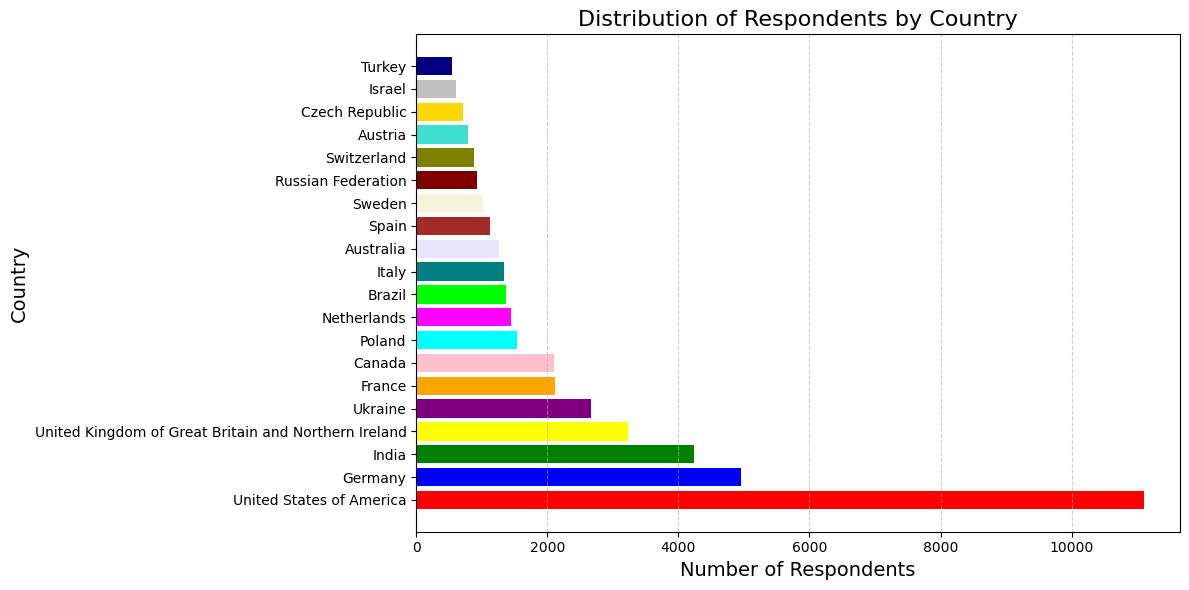

In [267]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define the colors (as a tuple/list)
colours = (
    "red",          # Use lowercase for matplotlib's built-in colors
    "blue",
    "green",
    "yellow",
    "purple",
    "orange",
    "pink",
    "cyan",
    "magenta",
    "lime",
    "teal",
    "lavender",
    "brown",
    "beige",
    "maroon",
    "olive",
    "turquoise",
    "gold",
    "silver",
    "navy"
)

# Create the bar chart
plt.barh(da['Country'], da['Count'], color=colours)  # Remove quotes around 'colours'

# Add titles and labels
plt.title('Distribution of Respondents by Country', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Show the grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Stylized grid

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()

#### Bubble Plot of Technology Preferences by Age

In [268]:
##Write your code here
r = df[['LanguageHaveWorkedWith','Age']].dropna()

In [269]:
def median_age(age):
    if pd.isna(age):  # Check if the rating is NaN
        return None  #
    if 'Under 18 years old' in age:
        return 17
    elif '18-24 years old' in age:
        return 21
    elif '25-34 years old' in age:
        return 30
    elif '35-44 years old' in age:
        return 40
    elif '45-54 years old' in age:
        return 50
    elif '55-64 years old' in age:
        return 60
    elif '65 years or older' in age:
        return 70
r['Age'] = r['Age'].apply(median_age)

In [270]:
r['LanguageHaveWorkedWith'] = r['LanguageHaveWorkedWith'].str.split(';')
r_exploit = r.explode('LanguageHaveWorkedWith')

In [271]:
# Count frequency of each language by age group
language_age_frequency = r_exploit.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

In [272]:
language_age_frequency

,Age,LanguageHaveWorkedWith,Frequency
0,17.0,Ada,25
1,17.0,Apex,7
2,17.0,Assembly,242
3,17.0,Bash/Shell (all shells),747
4,17.0,C,746
...,...,...,...
338,70.0,TypeScript,64
339,70.0,VBA,96
340,70.0,Visual Basic (.Net),63
341,70.0,Zephyr,3


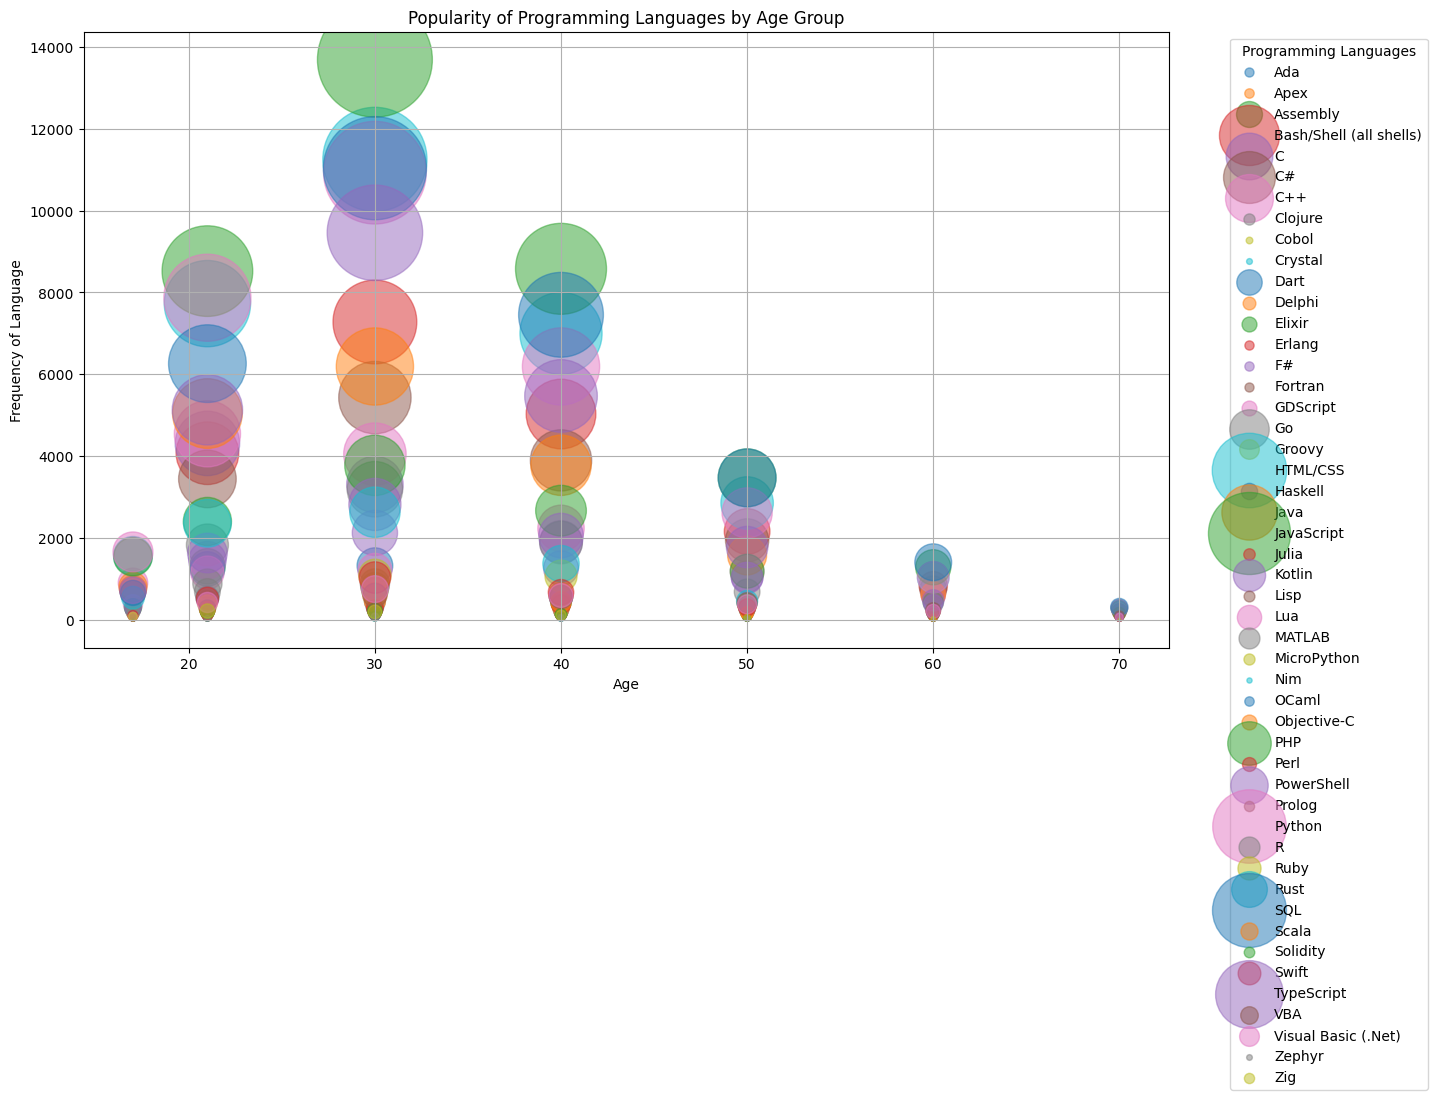

In [273]:
# Step 2: Create the bubble plot
plt.figure(figsize=(14, 8))
# Scatter plot with Age on the x-axis, Frequency of the language on the y-axis,
# and the size of the bubbles representing the frequency of each language
for language in language_age_frequency['LanguageHaveWorkedWith'].unique():
    language_data = language_age_frequency[language_age_frequency['LanguageHaveWorkedWith'] == language]
    
    plt.scatter(language_data['Age'], 
                language_data['Frequency'], 
                s=language_data['Frequency'] * 0.5,  # Scale bubble sizes for visibility
                alpha=0.5, 
                label=language)

plt.title('Popularity of Programming Languages by Age Group')
plt.xlabel('Age')
plt.ylabel('Frequency of Language')
plt.legend(title='Programming Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Top 5 Programming Languages Respondents Have Worked With

In [274]:
##Write your code here
dq = df[['LanguageHaveWorkedWith']]

In [275]:
dq = dq.dropna()

In [276]:
dq['LanguageHaveWorkedWith'] = dq['LanguageHaveWorkedWith'].str.split(';')
dq = dq.explode('LanguageHaveWorkedWith')

In [277]:
top_5_Languages = dq['LanguageHaveWorkedWith'].value_counts().nlargest(5)

In [278]:
top_5_Languages

LanguageHaveWorkedWith
JavaScript    37503
HTML/CSS      31826
Python        30727
SQL           30690
TypeScript    23160
Name: count, dtype: int64

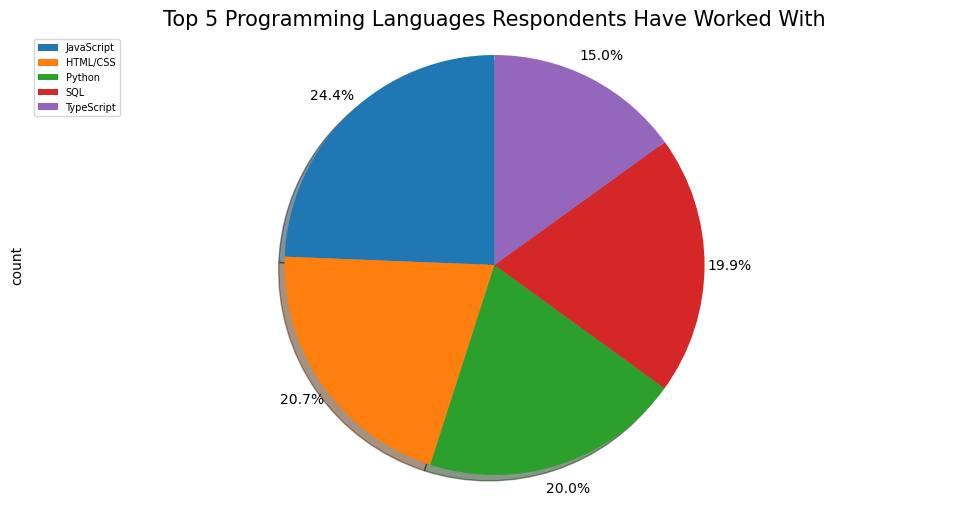

In [279]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0, 0.1] # ratio for each continent with which to offset each wedge.

top_5_Languages.plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )
#scale the title up by 12% to match pctdistance
plt.title('Top 5 Programming Languages Respondents Have Worked With', fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=top_5_Languages.index, loc='upper left', fontsize=7) 

plt.show()

#### Preferred databases by Age Group

In [280]:
##Write your code here
t = df[['DatabaseAdmired','Age']]

In [281]:
t = t.dropna()

In [282]:
def median_age(age):
    if pd.isna(age):  # Check if the rating is NaN
        return None  #
    if 'Under 18 years old' in age:
        return 17
    elif '18-24 years old' in age:
        return 21
    elif '25-34 years old' in age:
        return 30
    elif '35-44 years old' in age:
        return 40
    elif '45-54 years old' in age:
        return 50
    elif '55-64 years old' in age:
        return 60
    elif '65 years or older' in age:
        return 70
t['Age'] = t['Age'].apply(median_age)

In [283]:
t['DatabaseAdmired']=t['DatabaseAdmired'].str.split(';')
t = t.explode('DatabaseAdmired')

In [284]:
t['DatabaseAdmired'].value_counts().nlargest(5)

DatabaseAdmired
PostgreSQL              19019
MySQL                   11086
SQLite                  10891
Microsoft SQL Server     7231
MongoDB                  7213
Name: count, dtype: int64

In [285]:
Database = ['PostgreSQL', 'MySQL','SQLite','Microsoft SQL Server','MongoDB']
filtered_data = t[t['DatabaseAdmired'].isin(Database)]

In [286]:
grouped_count = filtered_data.groupby(['Age', 'DatabaseAdmired']).size().reset_index(name='Count')

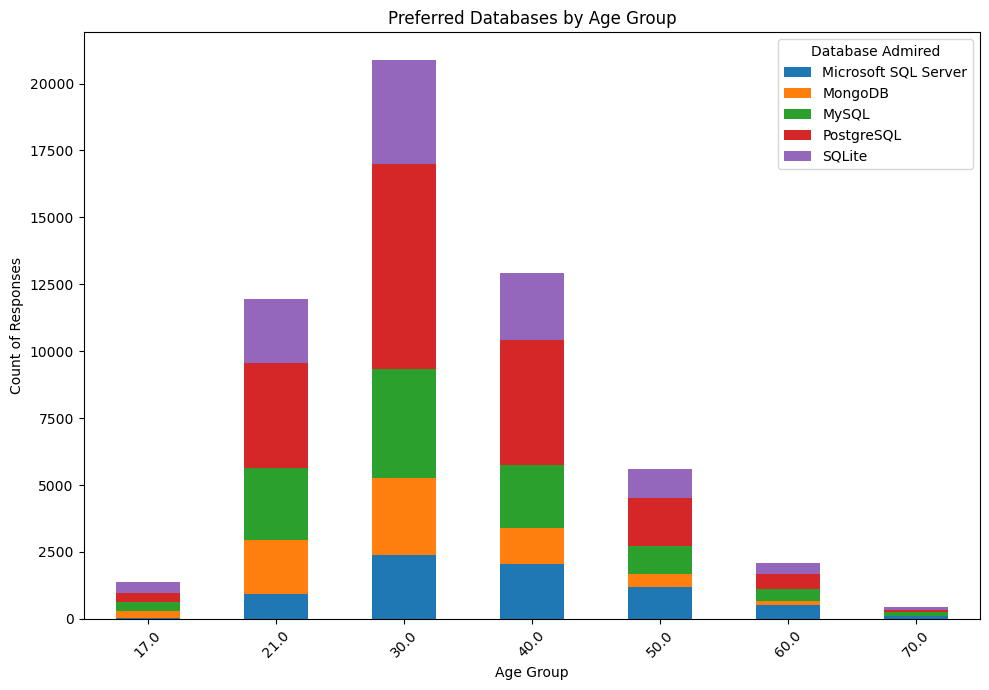

In [287]:
# Pivot the DataFrame to get the desired format for plotting
pivot_df = grouped_count.pivot(index='Age', columns='DatabaseAdmired', values='Count').fillna(0)

# Plotting the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding titles and labels
plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Responses')
plt.legend(title='Database Admired')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()